In [7]:
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [8]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 16,
  'grid.alpha': 0.25})

The dataset is downloaded from 
https://archive.ics.uci.edu/dataset/267/banknote+authentication`

Read data input from file

In [9]:
with open("./data_banknote_authentication.txt") as f:
  reader = csv.reader(f)
  next(reader)

  data = []
  for row in reader:
    data.append({
      "evidence": [float(cell) for cell in row[:4]],
      "label": 1 if row[4] == "0" else 0
    })

data

[{'evidence': [4.5459, 8.1674, -2.4586, -1.4621], 'label': 1},
 {'evidence': [3.866, -2.6383, 1.9242, 0.10645], 'label': 1},
 {'evidence': [3.4566, 9.5228, -4.0112, -3.5944], 'label': 1},
 {'evidence': [0.32924, -4.4552, 4.5718, -0.9888], 'label': 1},
 {'evidence': [4.3684, 9.6718, -3.9606, -3.1625], 'label': 1},
 {'evidence': [3.5912, 3.0129, 0.72888, 0.56421], 'label': 1},
 {'evidence': [2.0922, -6.81, 8.4636, -0.60216], 'label': 1},
 {'evidence': [3.2032, 5.7588, -0.75345, -0.61251], 'label': 1},
 {'evidence': [1.5356, 9.1772, -2.2718, -0.73535], 'label': 1},
 {'evidence': [1.2247, 8.7779, -2.2135, -0.80647], 'label': 1},
 {'evidence': [3.9899, -2.7066, 2.3946, 0.86291], 'label': 1},
 {'evidence': [1.8993, 7.6625, 0.15394, -3.1108], 'label': 1},
 {'evidence': [-1.5768, 10.843, 2.5462, -2.9362], 'label': 1},
 {'evidence': [3.404, 8.7261, -2.9915, -0.57242], 'label': 1},
 {'evidence': [4.6765, -3.3895, 3.4896, 1.4771], 'label': 1},
 {'evidence': [2.6719, 3.0646, 0.37158, 0.58619], 'la

Separate data into training and testing groups

In [10]:
evidence = [row["evidence"] for row in data]
labels = [row["label"] for row in data]

X_training, X_testing, y_training, y_testing = train_test_split(
  evidence, labels, test_size=0.4)
X_training = np.array(X_training)
X_testing = np.array(X_testing)
y_training = np.array(y_training)
y_testing = np.array(y_testing)

Check the number of training and testing data

In [11]:
len(X_training), len(X_testing), len(y_training), len(y_testing)

(822, 549, 822, 549)

Check the first 10 data points of training data

In [12]:
X_training[:10], y_training[:10]

(array([[  3.6941  ,  -3.9482  ,   4.2625  ,   1.1577  ],
        [  4.0102  ,  10.6568  ,  -4.1388  ,  -5.0646  ],
        [ -3.0986  , -10.4602  ,   8.9717  ,  -2.3427  ],
        [  3.583   ,  -3.7971  ,   3.4391  ,  -0.12501 ],
        [ -2.2153  ,  11.9625  ,   0.078538,  -7.7853  ],
        [  0.6005  ,   1.9327  ,  -3.2888  ,  -0.32415 ],
        [  1.3566  ,   4.2358  ,   2.1341  ,   0.3211  ],
        [ -2.2987  ,  -5.227   ,   5.63    ,   0.91722 ],
        [ -0.10648 ,  -0.76771 ,   7.7575  ,   0.64179 ],
        [ -3.8167  ,   5.1401  ,  -0.65063 ,  -5.4306  ]]),
 array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0]))

Create a neural network

<img src="../img-sources/banknotes-neural-networks.png" width=400>

In [13]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input((4, )))

# Add a hidden layer with 8 units, with ReLU activation
model.add(tf.keras.layers.Dense(8,  activation="relu"))

# Add output layer with 1 unit, with sigmoid activation
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

Train neural network

In [14]:
model.compile(
  optimizer="adam",
  loss="binary_crossentropy",
  metrics=["accuracy"]
)
history = model.fit(X_training, y_training, epochs=20)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3002 - loss: 0.9067   
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.3669 - loss: 0.7724
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.5363 - loss: 0.6468
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.6907 - loss: 0.5553
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8388 - loss: 0.4822
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.9041 - loss: 0.4021
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.9243 - loss: 0.3665
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.9399 - loss: 0.3243
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.9337 - loss: 0.3017
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9495 - loss: 0.2530
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.9384 - loss: 0.2413
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/ste

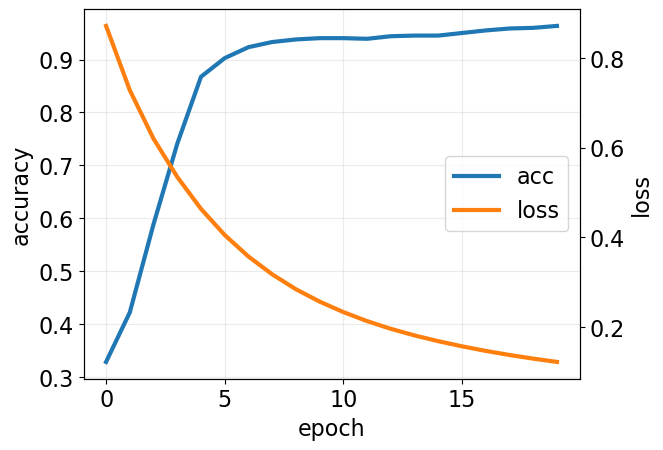

In [15]:
# dir(history)
acc = history.history["accuracy"]
loss = history.history["loss"]

fig, ax = plt.subplots()

ax.plot(acc, label="acc", linewidth=3)
ax.set_xlabel("epoch")
ax.set_ylabel("accuracy")
ax.grid("on")

ax_right = ax.twinx()
ax_right.plot(loss, color="tab:orange", label="loss", linewidth=3)
ax_right.set_ylabel("loss")

handles_ax, labels_ax = ax.get_legend_handles_labels()
handles_ax_right, labels_ax_right = ax_right.get_legend_handles_labels()
handles = handles_ax + handles_ax_right
labels = labels_ax + labels_ax_right
ax.legend(handles, labels, loc="center right")

plt.show(fig)

Evaluate how weel model performs

In [16]:
model.evaluate(X_testing, y_testing, verbose=2)

18/18 - 0s - 5ms/step - accuracy: 0.9526 - loss: 0.1215


[0.12151537090539932, 0.9526411890983582]